In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [49]:
fake = pd.read_csv("C:/Users/MOUNIKA/OneDrive/Desktop/Projects/Fake-News-Detection-using-Machine-Learning-master/data/Fake.csv")
true = pd.read_csv("C:/Users/MOUNIKA/OneDrive/Desktop/Projects/Fake-News-Detection-using-Machine-Learning-master/data/True.csv")

In [68]:
fake.shape

(23481, 5)

In [86]:
true.shape

(21417, 4)

In [87]:
fake['target'] = 'fake'
true['target'] = 'true'

In [88]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [89]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [90]:
data.head()

,title,text,subject,date,target
0,"U.S. has credibility with both Israel, Palesti...",UNITED NATIONS (Reuters) - The United States s...,worldnews,"December 8, 2017",true
1,DONALD TRUMP JR. WRECKS “Fake Indian” Elizabet...,Senator Elizabeth Warren took to Twitter to ch...,politics,"Mar 25, 2017",fake
2,COMMIE OBAMA BASHES AMERICA: “I personally wou...,Wow! We REALLY do have a serious problem with ...,politics,"Mar 21, 2016",fake
3,UNREAL! GROUP OF SIX-YEAR OLD THUG KIDS Curse ...,This video is so disturbing but is a great exa...,left-news,"Mar 30, 2016",fake
4,Exclusive: Trump considering fracking mogul Ha...,CLEVELAND (Reuters) - Republican presidential ...,politicsNews,"July 21, 2016",true


In [91]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"U.S. has credibility with both Israel, Palesti...",UNITED NATIONS (Reuters) - The United States s...,worldnews,true
1,DONALD TRUMP JR. WRECKS “Fake Indian” Elizabet...,Senator Elizabeth Warren took to Twitter to ch...,politics,fake
2,COMMIE OBAMA BASHES AMERICA: “I personally wou...,Wow! We REALLY do have a serious problem with ...,politics,fake
3,UNREAL! GROUP OF SIX-YEAR OLD THUG KIDS Curse ...,This video is so disturbing but is a great exa...,left-news,fake
4,Exclusive: Trump considering fracking mogul Ha...,CLEVELAND (Reuters) - Republican presidential ...,politicsNews,true


In [92]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,UNITED NATIONS (Reuters) - The United States s...,worldnews,true
1,Senator Elizabeth Warren took to Twitter to ch...,politics,fake
2,Wow! We REALLY do have a serious problem with ...,politics,fake
3,This video is so disturbing but is a great exa...,left-news,fake
4,CLEVELAND (Reuters) - Republican presidential ...,politicsNews,true


In [93]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,united nations (reuters) - the united states s...,worldnews,true
1,senator elizabeth warren took to twitter to ch...,politics,fake
2,wow! we really do have a serious problem with ...,politics,fake
3,this video is so disturbing but is a great exa...,left-news,fake
4,cleveland (reuters) - republican presidential ...,politicsNews,true


In [96]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [98]:
data.head()

,text,subject,target
0,united nations reuters the united states stil...,worldnews,true
1,senator elizabeth warren took to twitter to ch...,politics,fake
2,wow we really do have a serious problem with t...,politics,fake
3,this video is so disturbing but is a great exa...,left-news,fake
4,cleveland reuters republican presidential can...,politicsNews,true


In [99]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MOUNIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
data.head()

,text,subject,target
0,united nations reuters united states still cre...,worldnews,true
1,senator elizabeth warren took twitter cheer fa...,politics,fake
2,wow really serious problem antiamerican jackho...,politics,fake
3,video disturbing great example zero parenting ...,left-news,fake
4,cleveland reuters republican presidential cand...,politicsNews,true


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


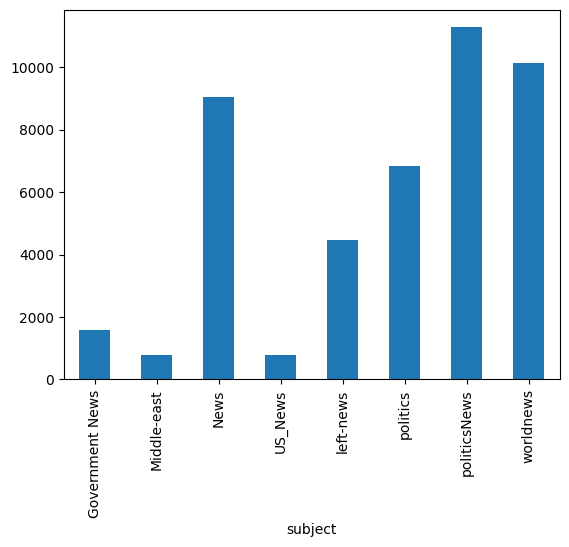

In [101]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


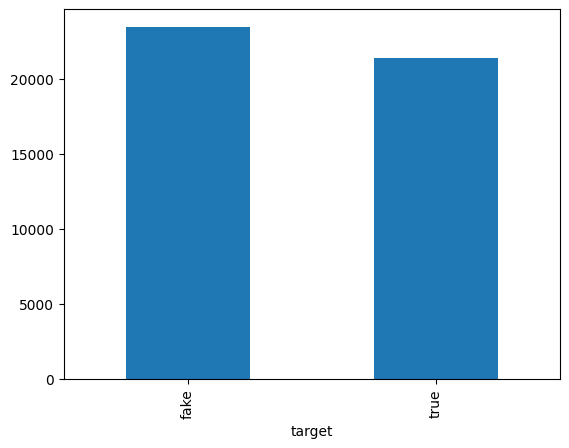

In [108]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

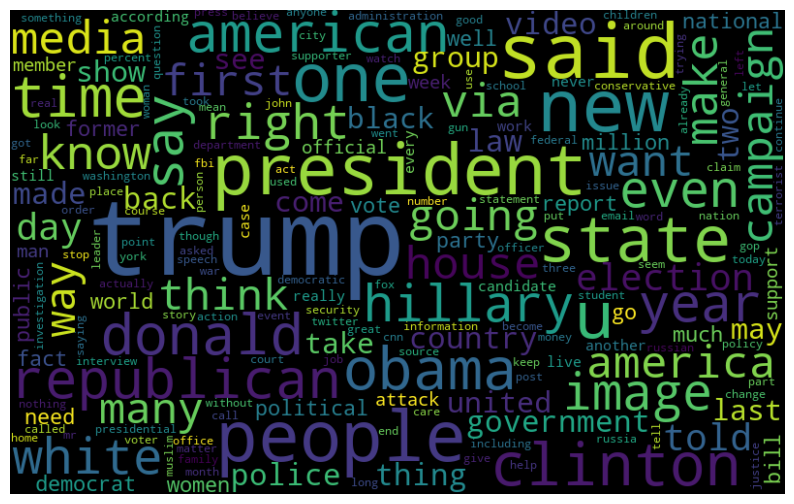

In [103]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

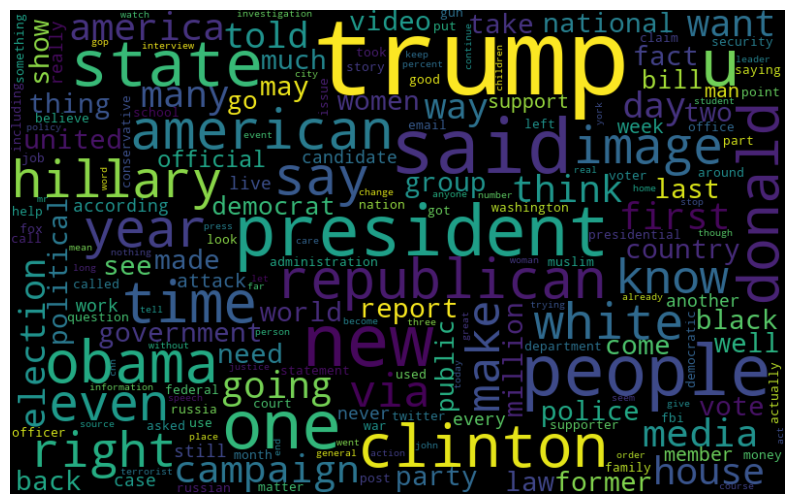

In [104]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [109]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

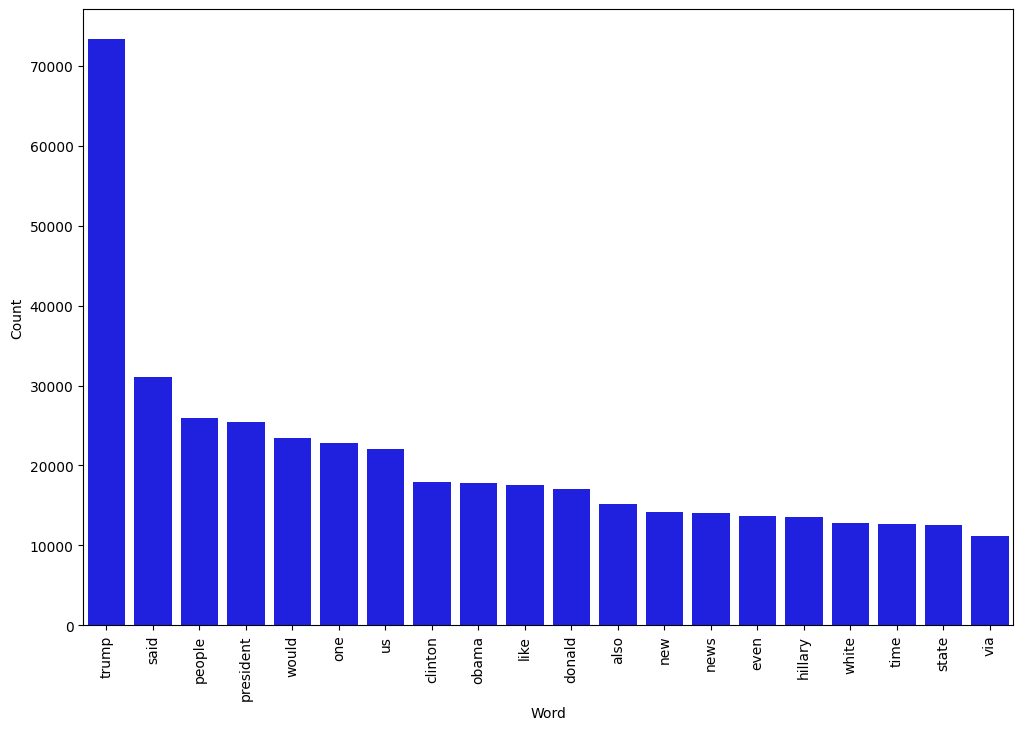

In [110]:
counter(data[data["target"] == "fake"], "text", 20)

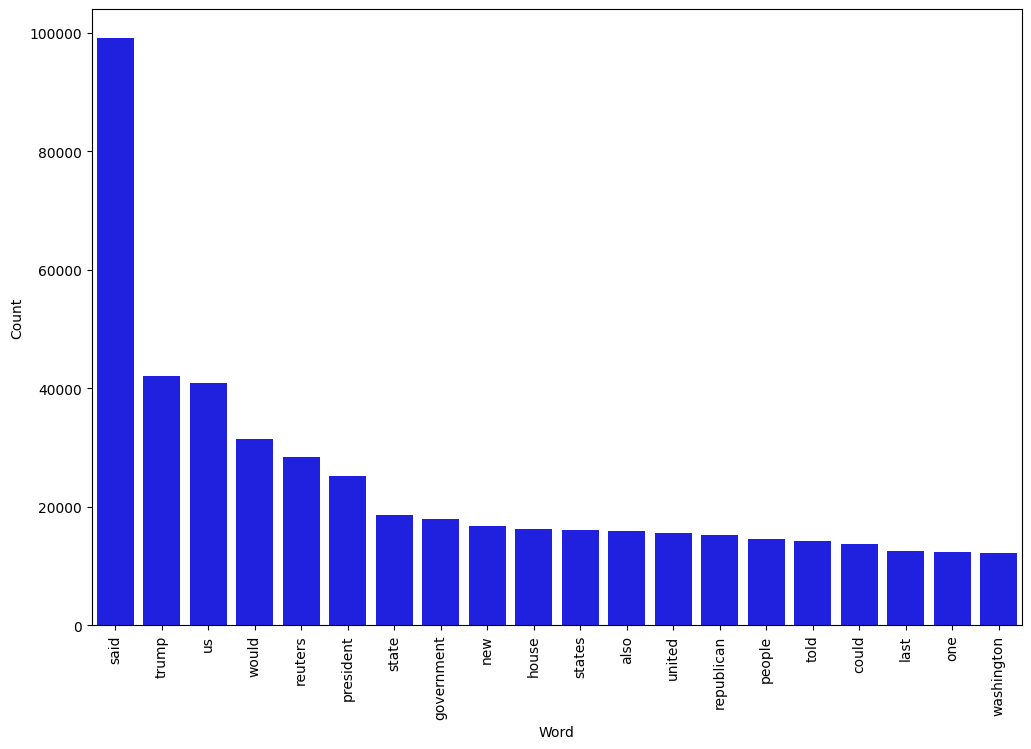

In [111]:
counter(data[data["target"] == "true"], "text", 20)

In [115]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [116]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [117]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.17%


Confusion matrix, without normalization


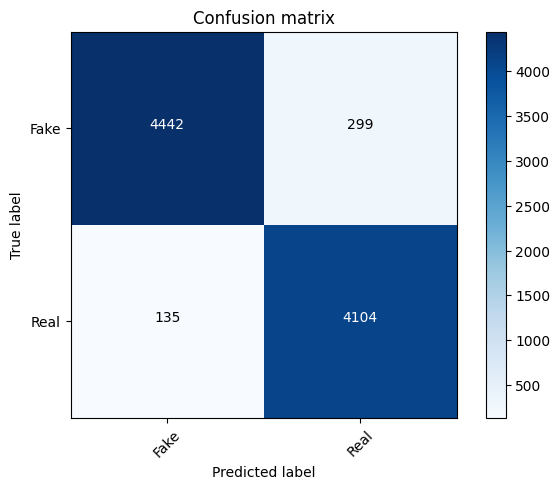

In [118]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [119]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.79%


Confusion matrix, without normalization


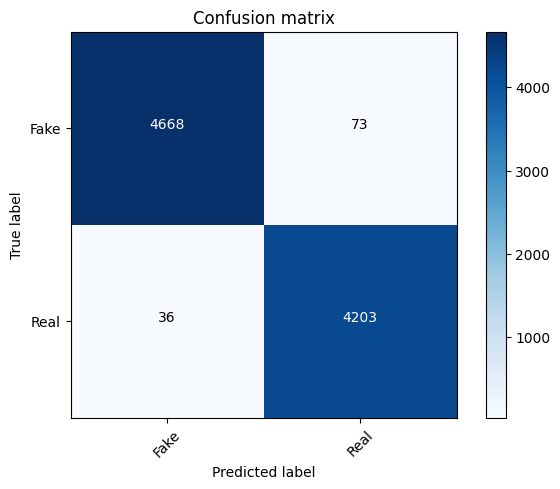

In [120]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [121]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.55%


Confusion matrix, without normalization


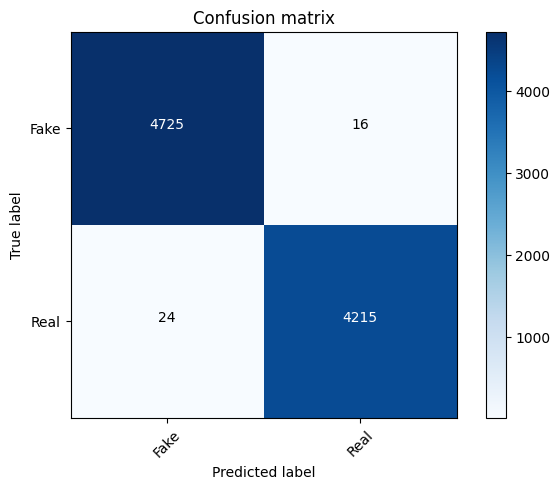

In [122]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [123]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.74%


Confusion matrix, without normalization


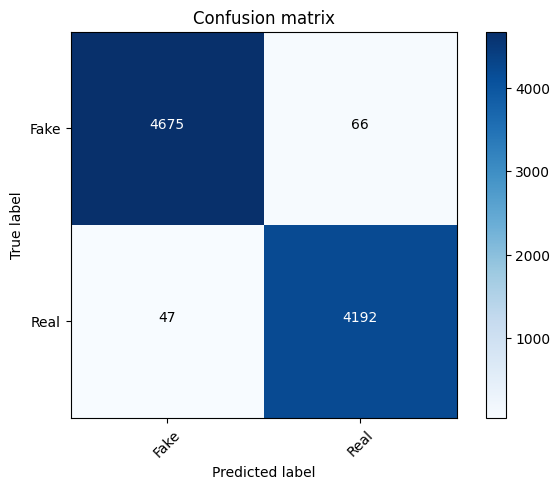

In [124]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])